In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
df = pd.read_excel('/content/energy.xlsx', index_col = "DATE", parse_dates = True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1985-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  408 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [ ]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [ ]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [ ]:
df.columns = ['producao']
df.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


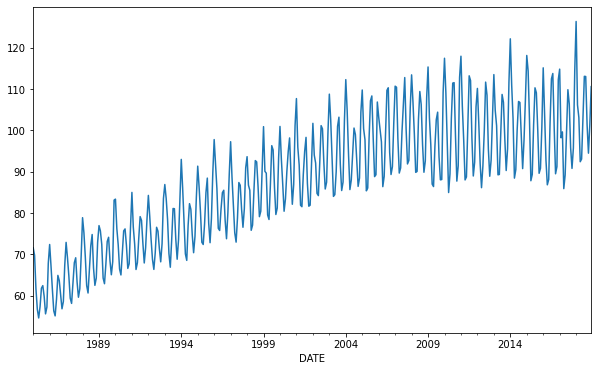

In [ ]:
df['producao'].plot(figsize=(10,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 576x432 with 0 Axes>

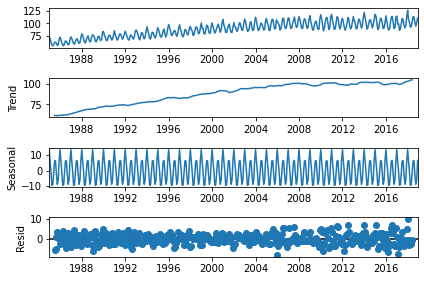

In [ ]:
resultado = seasonal_decompose(df)
fig = plt.figure(figsize = (8,6))
fig = resultado.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['producao'].dropna())
print(f'Teste ADF: {result[0]}')
print(f'p-valor: {result[1]}') # p-valor >0.05, portanto a hip nula é verdadeira (série não é estacionária)

Teste ADF: -2.252399047046584
p-valor: 0.18777984601968167


In [ ]:
result = adfuller(df['producao'].diff().dropna()) #diif = diferença entre o de baixo e o de cima
print(f'Teste ADF: {result[0]}')
print(f'p-valor: {result[1]}') # Rejeita a hip nula (é estacionária) --> pode seguir com a análise

Teste ADF: -7.450892277526348
p-valor: 5.6745699558553634e-11


In [ ]:
fit_arima = auto_arima(df,
                       d = 1,
                       start_p = 1,
                       start_q = 1,
                       max_p = 3,
                       max_q = 3,
                       seasonal = True,
                       m = 6, D = 1,
                       start_P = 1,
                       start_Q = 1,
                       max_P = 2,
                       max_Q = 2,
                       information_criterion = 'aic',
                       trace = True,
                       error_action = 'ignore',
                       stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.25 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.54 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=1.52 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=1.36 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=2.19 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=1.20 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.80 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=1.45 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=3.49 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [ ]:
#Quanto menor o AIC, melhor para nós (menor o erro)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(df, order = (1,1,1), seasonal_order= (1,1,2,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Tue, 22 Nov 2022   AIC                           1866.400
Time:                                        12:41:00   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.065      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicoes = resultado_sarimax.get_prediction(start = -12)
predicao_media = predicoes.predicted_mean

In [ ]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]
limite_abaixo[0], limite_acima[0]

(115.14474825026089, 124.45517746431635)

In [ ]:
predicao_media[0]

119.79996285728862

In [ ]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

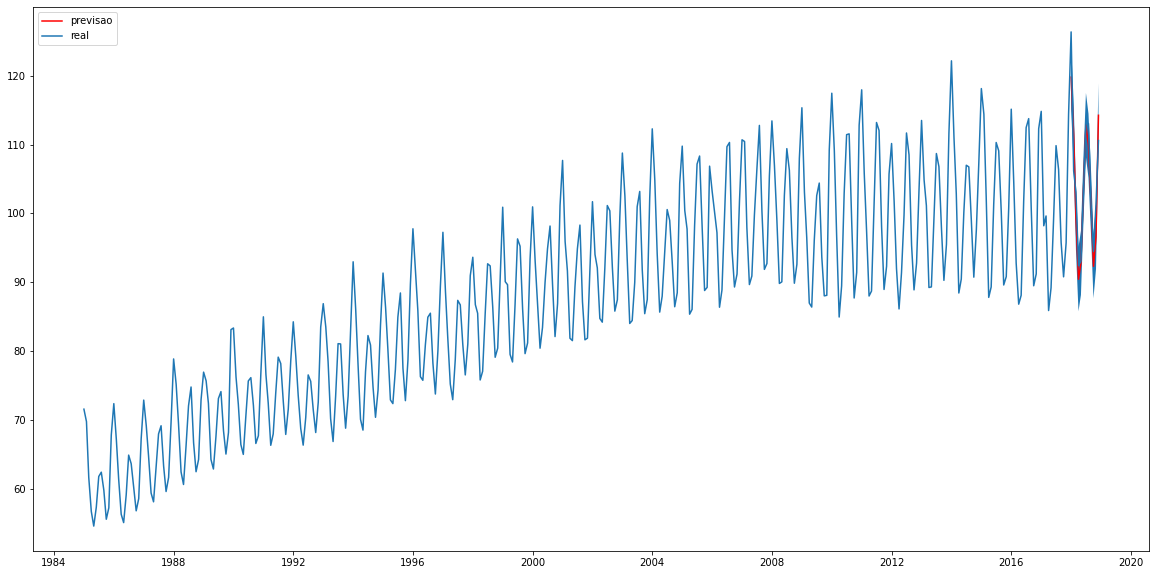

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(datas_previsao, predicao_media.values, color = 'red', label = 'previsao')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima)
plt.plot(datas, df.values, label = 'real')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(df[-12:].values, predicao_media.values)
print(mae)

2.7071206501168845


In [ ]:
forecast = resultado_sarimax.get_forecast(steps = 12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [ ]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

(91.38813221555213, 103.10930917451398)

In [ ]:
forecast_medio[10]

97.24872069503306

In [ ]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicao_media.index)

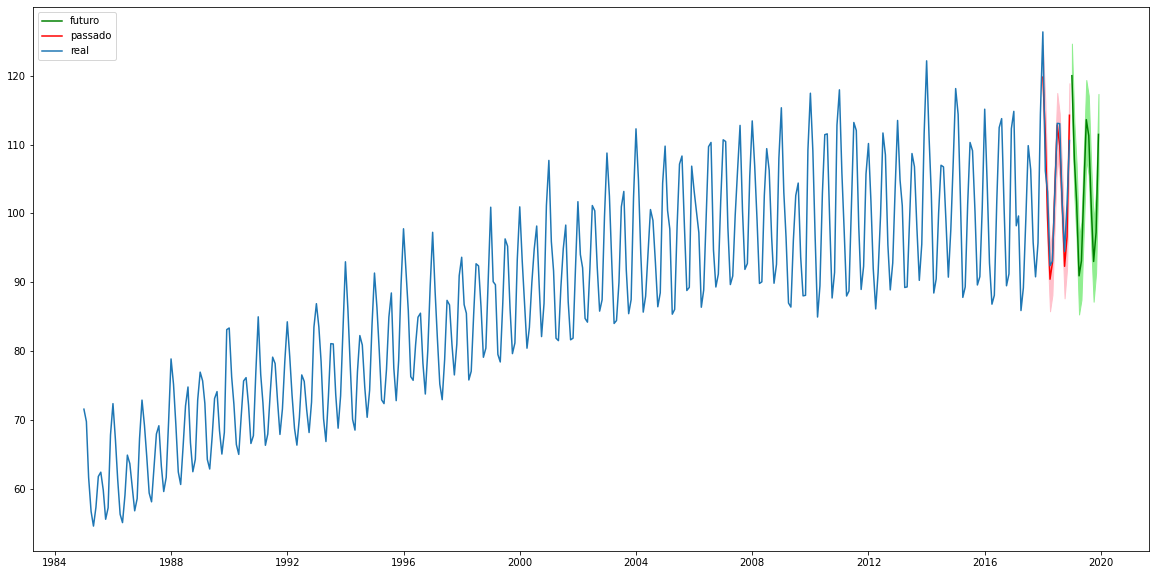

In [ ]:
dates = np.asarray(df.index)
plt.figure(figsize = (20,10))

plt.plot(datas_forecast, forecast_medio.values, color = 'green', label = 'futuro')
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color = 'lightgreen')

plt.plot(datas_previsao, predicao_media.values, color = 'red', label = 'passado')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color = 'pink')

plt.plot(dates, df.values, label = 'real')

plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
treino = df.loc[df.index<'2016-12-31']
validacao = df.loc[df.index>'2016-12-31']

treino.shape, validacao.shape

((384, 1), (24, 1))

In [ ]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [ ]:
treino['target'] = treino['producao'].shift(-1)
treino.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [ ]:
treino.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
validacao['target'] = validacao['producao'].shift(-1)
validacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [ ]:
validacao.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
x_treino = treino.loc[:,['producao']].values
y_treino = treino.loc[:,['target']].values
x_validacao = validacao.loc[:,['producao']].values
y_validacao = validacao.loc[:,['target']].values

In [ ]:
modelo_xgba = XGBRegressor()
modelo_xgba.fit(x_treino, y_treino)

[12:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
validacao.iloc[0]

producao    114.8282
target       98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [ ]:
predicao = modelo_xgba.predict(x_validacao)
predicao

array([104.399086,  95.61575 , 103.10387 ,  85.04508 ,  94.05464 ,
        98.045296, 103.522705, 103.06118 ,  96.16103 ,  97.07032 ,
        96.16103 , 104.22538 , 110.307556, 102.25154 , 101.48239 ,
        93.75535 ,  90.328575, 101.48239 , 111.06515 , 111.06515 ,
       101.72752 ,  94.60005 , 101.72752 ], dtype=float32)

In [ ]:
validacao['pred'] = predicao
validacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,104.399086
2017-02-01,98.2191,99.6408,95.615753
2017-03-01,99.6408,85.9106,103.103867
2017-04-01,85.9106,89.2053,85.045082
2017-05-01,89.2053,99.1945,94.054642


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x_validacao, predicao)

3.586096144701088